In [2]:
import requests
import json
import networkx as nx
from IPython.display import Image
from py2cytoscape import util as cy

import numpy as np

# Basic Setup
PORT_NUMBER = 1234

#IP = '192.168.1.1'
IP = 'localhost'

BASE = 'http://' + IP + ':' + str(PORT_NUMBER) + '/v1/'

# Header for posting data to the server as JSON
HEADERS = {'Content-Type': 'application/json'}

# Delete all networks in current session
requests.delete(BASE + 'session')

<Response [200]>

In [3]:
graphs = {}
NUMBER_OF_NODES = 100

# Scale-Free
g= nx.scale_free_graph(NUMBER_OF_NODES)

bc = nx.betweenness_centrality(g)
degree = nx.degree(g)
cc = nx.closeness_centrality(g)
nx.set_node_attributes(g, 'betweenness', bc)
nx.set_node_attributes(g, 'closeness', cc)
nx.set_node_attributes(g, 'degree', degree)

g.graph["avg_shortest_path_len"] = nx.average_shortest_path_length(g)
g.graph["density"] = nx.density(g)

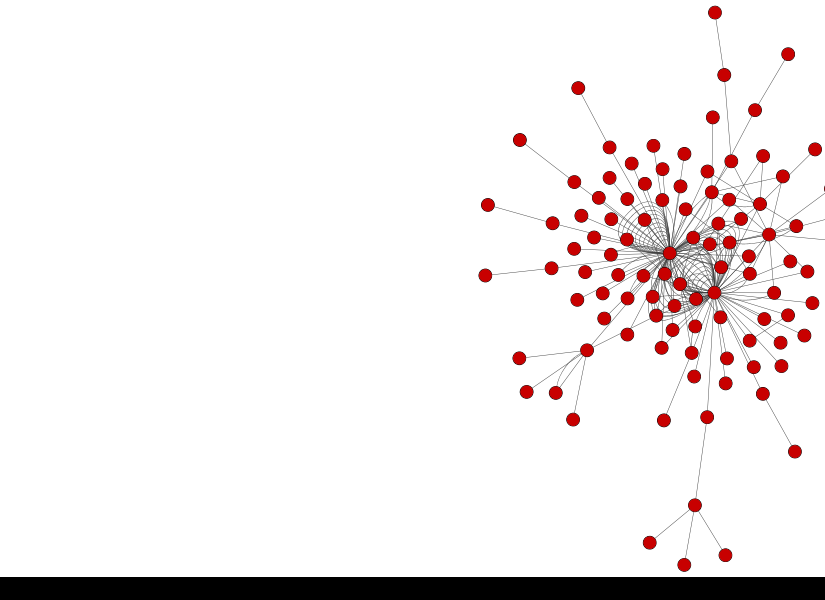

In [4]:
# Remove all networks
requests.delete(BASE + 'networks')

cyjs_network = cy.from_networkx(g)
res1 = requests.post(BASE + 'networks', data=json.dumps(cyjs_network), headers=HEADERS)
suid_res = res1.json()
suid = suid_res['networkSUID']
requests.get(BASE + 'apply/layouts/force-directed/' + str(suid))
Image(BASE+'networks/' + str(suid) + '/views/first.png')

In [5]:
res = requests.get(BASE + 'styles/default')
#print(json.dumps(json.loads(res.content), indent=4))

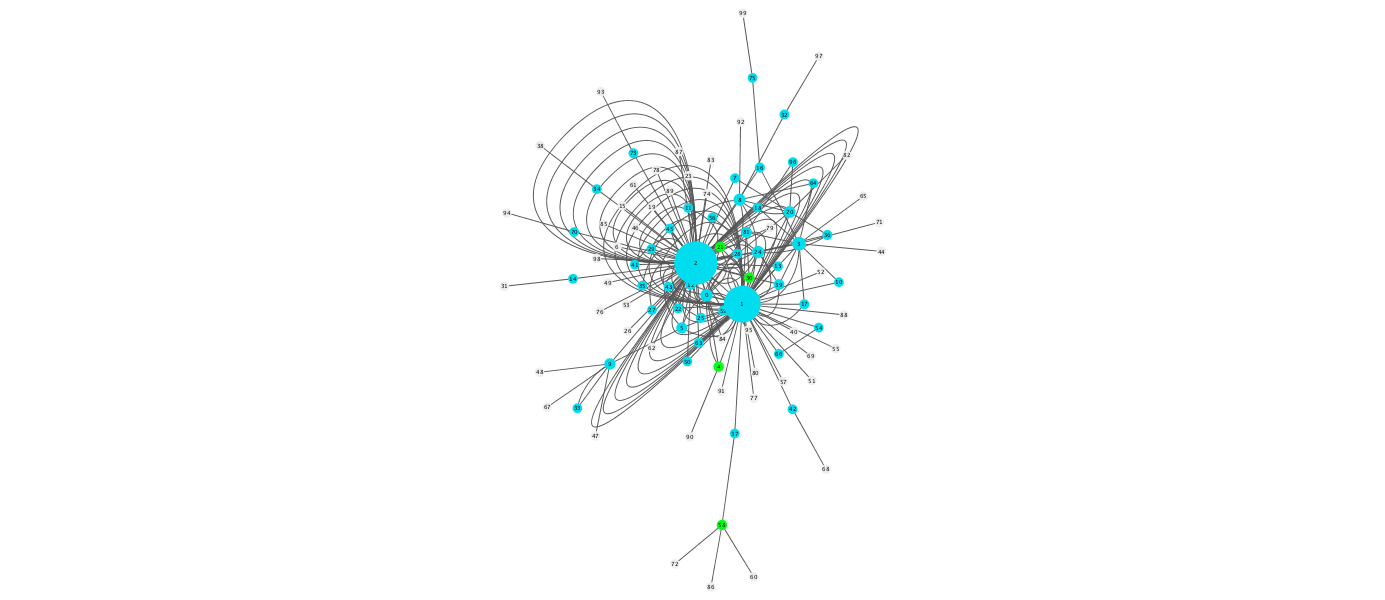

In [6]:
style_name = 'My Visual Style'

my_style = {
  "title" : style_name,
  "defaults" : [ {
    "visualProperty" : "EDGE_WIDTH",
    "value" : 2.0
  }, {
    "visualProperty" : "EDGE_STROKE_UNSELECTED_PAINT",
    "value" : "#555555"
  }, {
    "visualProperty" : "NODE_FILL_COLOR",
    "value" : "#00ddee"
  },{
    "visualProperty" : "NODE_BORDER_WIDTH",
    "value" : 0
  }, {
    "visualProperty" : "NODE_SIZE",
    "value" : 30
  }],
  "mappings" : [ {
    "mappingType" : "discrete",
    "mappingColumn" : "degree",
    "mappingColumnType" : "Double",
    "visualProperty" : "NODE_FILL_COLOR",
    "map" : [ {
      "key" : "1",
      "value" : "#eeeeee"
    }, {
      "key" : "4",
      "value" : "#00FF11"
    } ]
  }, {
    "mappingType" : "passthrough",
    "mappingColumn" : "name",
    "mappingColumnType" : "String",
    "visualProperty" : "NODE_LABEL"
  }, {
    "mappingType": "continuous",
    "visualProperty": "NODE_SIZE", 
    "mappingColumnType": "Double", 
    "mappingColumn": "degree",
    "points": [
        {
            "lesser": "1.0", 
            "equal": "20.0", 
            "value": 1, 
            "greater": "20.0"
        }, 
        {
            "lesser": "100.0", 
            "equal": "100.0", 
            "value": 120, 
            "greater": "1.0"
        }
    ] }
    ]
}

# Delete all style
requests.delete(BASE + "styles")

# Create new Visual Style
res = requests.post(BASE + "styles", data=json.dumps(my_style), headers=HEADERS)
new_style_name = res.json()['title']

# Apply it to current netwrok
requests.get(BASE + 'apply/styles/' + new_style_name + '/' + str(suid))

# Display it here!
Image(BASE+'networks/' + str(suid) + '/views/first.png')